In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation

%matplotlib notebook
NUM_NEIGHB =99
def get_site(coord, L):
    return coord[0]*L+coord[1]


def get_coord(site, L):
    x = site // L
    y = site % L
    return [x, y]


def get_neighbors(site, L,R):
    neighb = set()
    x, y = get_coord(site, L)
    for i in range(-round(R)-1, round(R)+2):
        for j in range(-round(R)-1, round(R)+2):
            x1 = (x + i)
            y1 = (y + j)
            if (x-x1)**2 + (y-y1)**2 <= R**2 :
                x1=x1%L
                y1=y1%L
                neighb.add(get_site([x1, y1], L))
    
    return list(neighb)
    
def tabulate_neighbors(L,R):
    Nsite = L**2
    NUM_NEIGHB= len(get_neighbors(0,L,R))
    print (NUM_NEIGHB)
    neighb = np.empty((Nsite, NUM_NEIGHB), dtype=int)
    for site in range(Nsite):
        neighb[site, :] = get_neighbors(site, L,R)
    return neighb




In [3]:

L=100
R=4
N=tabulate_neighbors(L,R)


49


In [4]:
get_neighbors(0,L,R)

[9600,
 0,
 1,
 2,
 3,
 4,
 9997,
 9998,
 9999,
 398,
 399,
 400,
 9897,
 9898,
 9899,
 9900,
 9901,
 9902,
 9903,
 297,
 298,
 299,
 300,
 301,
 302,
 197,
 9798,
 9799,
 9800,
 9801,
 9802,
 9803,
 198,
 199,
 200,
 201,
 202,
 203,
 96,
 97,
 98,
 99,
 9700,
 9701,
 9702,
 100,
 101,
 102,
 103]

In [6]:
N[0]

array([   0,    1,    2, 9998, 9999, 9899, 9900, 9901, 9902,  299,  198,
        199, 9800, 9801,  200,  201,   98,   99,  100,  101,  102])

In [5]:
def evolve2(field, neighbors, b, num_steps=1):
    
    L = field.shape[0]
    
    field = field.flatten()
    SIZE = len(field)
    current = np.zeros((SIZE), dtype=int)
    scores = np.zeros((SIZE), dtype=float)
    for step in range(num_steps):
        current = field.copy()
        scores = np.zeros((SIZE), dtype=float)
        for site in range(SIZE):
            for site1 in neighbors[site]:
                scores[site] += (1 - field[site1])
                
            if field[site] == 1:
                scores[site] *= b
                
        for site in range(SIZE):
            best_site = site
            for site1 in neighbors[site]:
                if (scores[best_site] < scores[site1]):
                    best_site = site1
                    
            field[site] = current[best_site]
    return np.reshape(field, (L,L))

In [7]:
rndm = np.random.RandomState(12345)
field = (rndm.uniform(size=(L,L)) > 0.5).astype(int)
field

array([[1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]])

In [8]:
field=evolve2(field,N,3,100)
field.sum()/(L**2)


KeyboardInterrupt: 

In [9]:
%load_ext cython

In [10]:
%%cython -a

import numpy as np

import cython

@cython.cdivision(True)
@cython.boundscheck(False)
@cython.wraparound(False)
def evolve2_1(grid_orig, long[:, :] neighbors, double b, int num_steps=1):
    cdef int L = grid_orig.shape[0]
    cdef int N_NEIGHB=len(neighbors[0])
    cdef short[:] grid = grid_orig.flatten()
    
    cdef int SIZE, step, site, site1, best_site, i
    SIZE = L*L
    cdef short[:] current = grid.copy()
    cdef double[:] _zeros = np.zeros((SIZE), dtype=float)
    cdef double[:] scores = np.zeros((SIZE), dtype=float)
    
    for step in range(num_steps):
        current = grid.copy()
        scores[...] = _zeros
        for site in range(SIZE):
            for i in range(N_NEIGHB):
                site1 = neighbors[site,i]
                scores[site] += (1 - grid[site1])
                
            if grid[site] == 1:
                scores[site] *= b
        
        for site in range(SIZE):
            best_site = site
            for i in range(N_NEIGHB):
                site1 = neighbors[site,i]
                if (scores[best_site] < scores[site1]):
                    best_site = site1
                    
            grid[site] = current[best_site]
    grid_orig = np.array(grid)
    return np.reshape(grid_orig, (L,L))

<IPython.core.display.Javascript object>


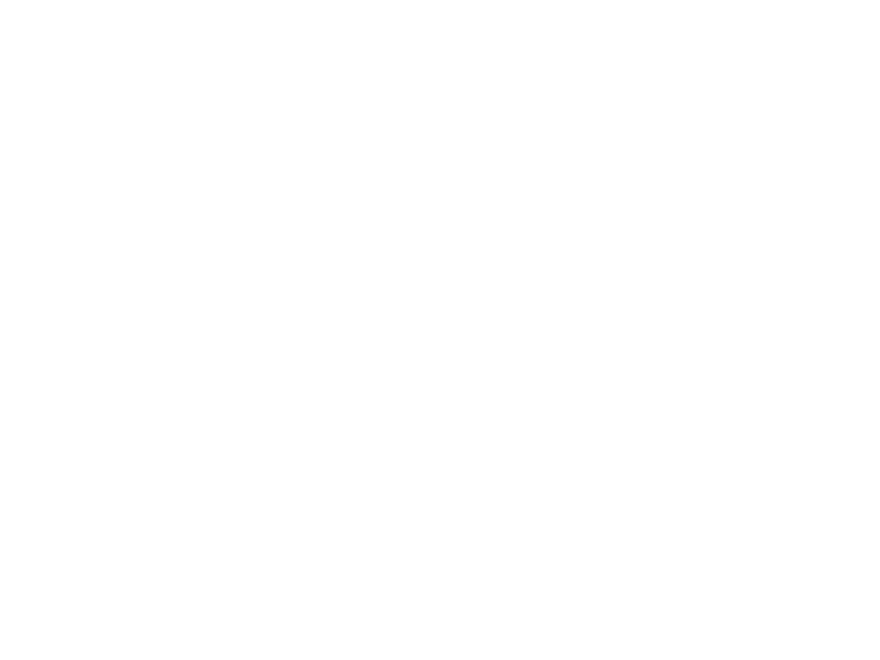

In [9]:
 %matplotlib notebook
B = set()
for c1 in range(14):
    for c2 in range(1, 14):
        if c1/c2 > 1 and c1 / c2 < 3:
            B.add((c1/c2) + 0.000000001)
B = sorted(list(B))
A=[]
rndm = np.random.RandomState(12345)
for b in B:
    A.append([])
    field = (rndm.uniform(size=(L,L)) > 0.9).astype("int16")
    for i in range(10):
        field=evolve2_1(field,N,b,100)
        A[-1].append(field.sum()/(L**2))
for i in range(len(B)):
    plt.plot( range(len(A[i])),A[i])
    plt.show()
     

<IPython.core.display.Javascript object>


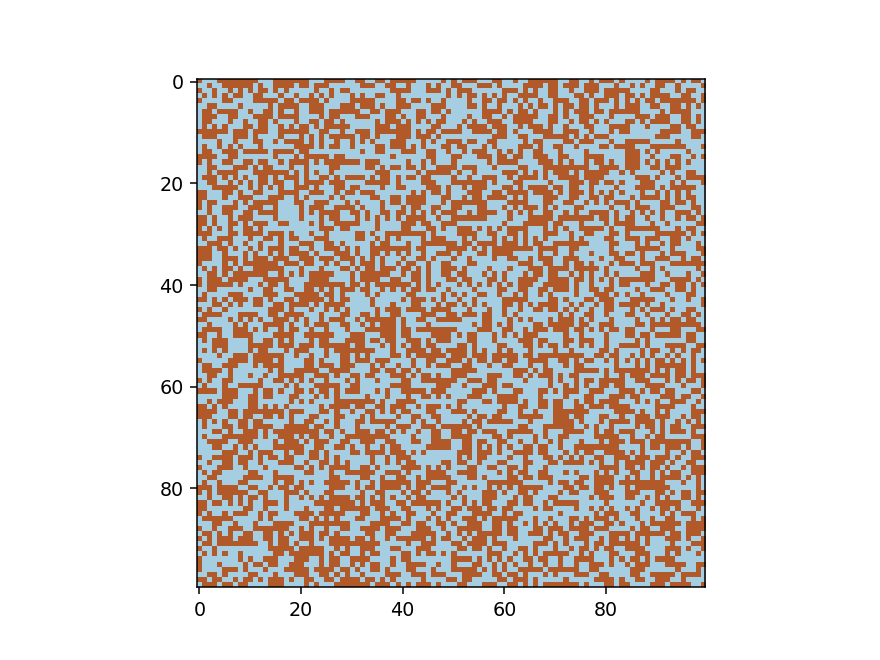

In [11]:
fig = plt.figure()
im = plt.imshow(field,  cmap=plt.get_cmap('Paired'))

In [ ]:
 %matplotlib notebook
B = set()
for c1 in range(26):
    for c2 in range(1, 26):
        if c1/c2 > 1 and c1 / c2 < 3:
            B.add((c1/c2) + 0.000000001)
B = sorted(list(B))
A=[]
rndm = np.random.RandomState(12345)
for b in B:
    A.append([])
    field = (rndm.uniform(size=(L,L)) > 0.5).astype("int16")
    for i in range(13):
        field=evolve2_1(field,N,b,100)
        A[-1].append(field.sum()/(L**2))
for i in range(len(B)):
    plt.plot( range(len(A[i])),A[i])
    plt.show()
     


In [13]:
L=100
R=4
N=tabulate_neighbors(L,R)
rndm = np.random.RandomState(4)
B = set()
for c1 in range(50):
    for c2 in range(1, 50):
        if c1/c2 > 1 and c1 / c2 < 1.75:
            B.add((c1/c2) + 0.000000001)
B = sorted(list(B))
C_PROB = 0.9 # test 0.1, 0.5, 0.9
N_STEPS = 100
N_MEASUR = 100
N_FIELDS = 10
BURN_IN_STEPS = 500
DIR_NAME = "NIS_R_4"
for i in range(len(B)):
    b = B[i]
    for k in range(N_FIELDS):
        results = np.zeros((N_MEASUR), dtype=float)
        field = (rndm.uniform(size=(L,L)) > C_PROB).astype('int16')
        field = evolve2_1(field, N, b, num_steps=BURN_IN_STEPS)
        for measure in range(N_MEASUR):
            field = evolve2_1(field, N, b, num_steps=N_STEPS)
            results[measure] =  1 - (field.sum() / (L**2))
        fname = DIR_NAME + "/" + str(i) + "_" + str(k)
        np.save(fname, results) 
        

49


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


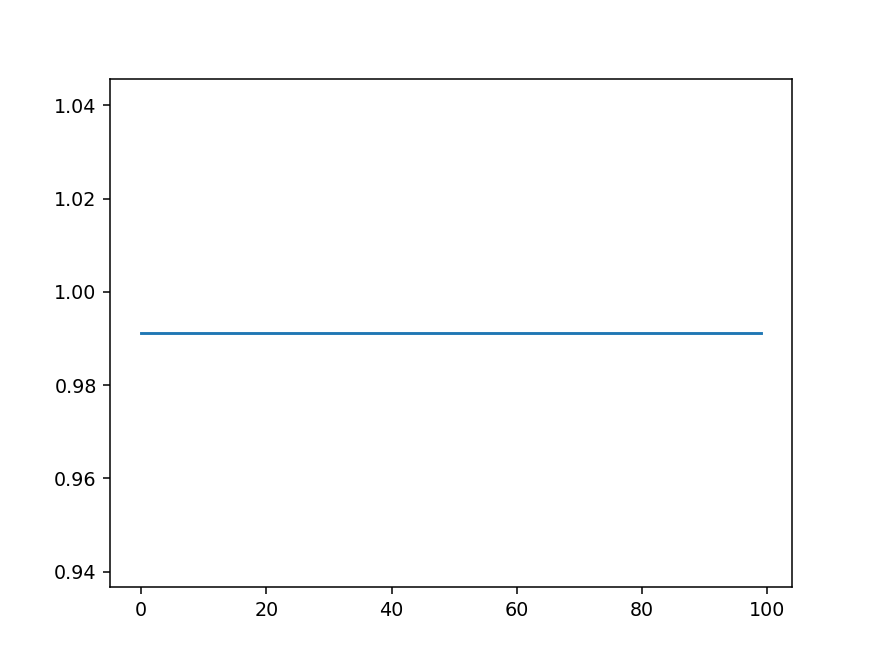

In [14]:
x=np.load("NIS_R_sqrt10/100_9.npy")
plt.plot(range(len(x)) , x)

In [15]:
Fc = np.zeros((len(B), 100), dtype=float)
for i in range(len(B)):
    for j in range(10):
        fname = 'NIS_R_4/' + str(i) + '_' + str(j) + '.npy'
        f = np.load(fname)
        plt.plot(range(len(f)), f)
        Fc[i] += f
    Fc[i] = Fc[i] / 10
plt.show()    

NameError: name 'B' is not defined

In [ ]:
Fc_mean = np.zeros((len(B)), dtype=float)
for i in range(len(B)):
    Fc_mean[i] =  (Fc[i].sum() / len(Fc[i]))

In [ ]:
plt.plot(B, Fc_mean, 'o', markersize = 2)